# Deep Learning  Lab Assignment - 2 

## | Name: Bagwe Sarvesh | | Student ID: 202211006 |

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

## Reading Data 

In [2]:
df1 = pd.read_csv("heart.csv") # Heart Attack Data 
df2 = pd.read_csv("train.csv") # Mobile Data 
df3 = pd.read_csv("50_Startups.csv") # 50_startups data

## 1) Heart Attack Data

### Data Visualisation

In [3]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1) There are no null values in the data set.  
2) There are 13 features and one target label with binary values.  
3) Before giving data to the model there is a need to normalize the data.   

### Heatmap

<AxesSubplot:>

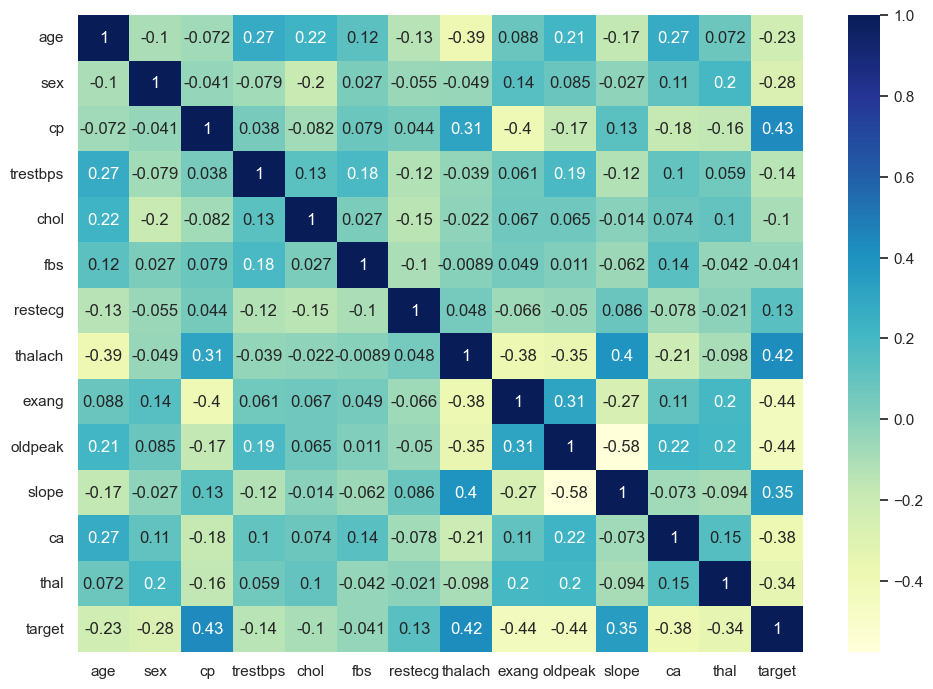

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df1.corr(), cmap="YlGnBu",annot =True)

#### From the above heatmap we can observe:  
* Features with high positive correlation: cp, thalach and slope.   
* Features with high negative correlation: exang, oldpeak, ca and thal.    
* Features that can be dropped due to low correlation: fbs, trestbps, chol and restecg. 

### Boxplot

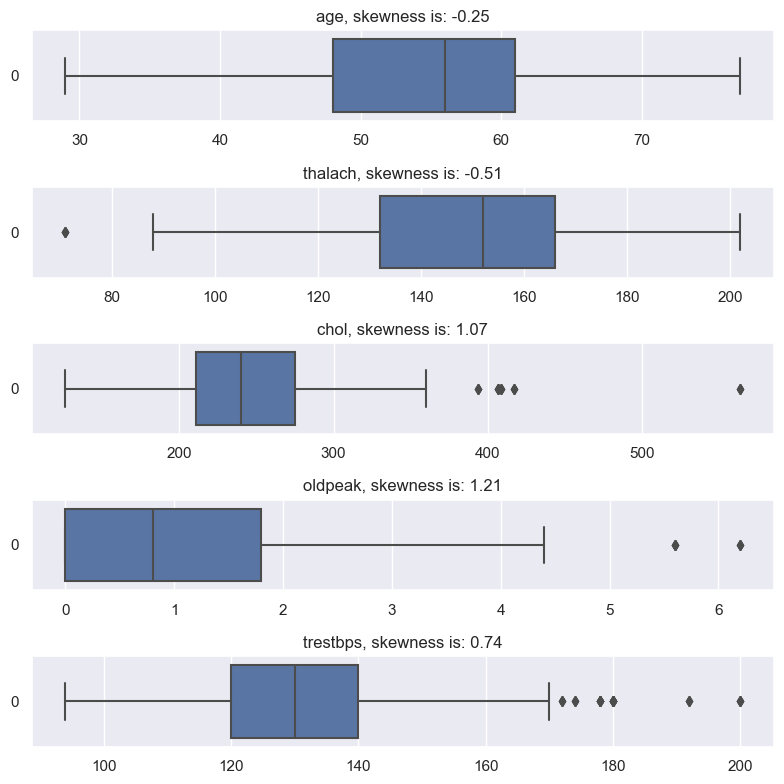

In [6]:
nums_cols = list(df1.loc[:,['age', 'thalach', 'chol', 'oldpeak', 'trestbps']])
fig, axs = plt.subplots(5, 1, sharey=True, figsize=(8,8))
axs = axs.flatten()
for i, data in enumerate(nums_cols):
    
    sns.boxplot(data=df1[data], orient='h', ax=axs[i])
    axs[i].set_title(data + ', skewness is: '+str(round(df1[data].skew(axis = 0, skipna = True),2)))
plt.tight_layout()


From the boxplox we can say there is a need to remove the outliers from the dataset. 

### Removing outliers

In [7]:
df1 = df1[(df1['thalach'] > 80)]  
df1 = df1[(df1['chol'] < 380)]
df1 = df1[(df1['oldpeak'] < 4.5)]
df1 = df1[(df1['trestbps'] < 170)]

We can see reduction in size of dataset due to outliers being removed.

In [8]:
df1.shape

(953, 14)

### Train-Test Splitting

In [9]:
x = df1.iloc[:,0:13]
y = df1.iloc[:,13:14]
x_train,x_val,y_train,y_val = train_test_split(x,y,shuffle = True,test_size=0.25)

# One Hot Encoding
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)


### Normalizing Data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### Artificial Neural Network Classifier 1

#### Neural Network : 128 --> 64 --> 16--> 2

In [11]:
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=50, validation_data = (x_val,y_val), batch_size=32)

Epoch 1/50
23/23 [==============================] - 2s 13ms/step - loss: 0.5492 - accuracy: 0.7297 - val_loss: 0.4278 - val_accuracy: 0.8285
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.3668 - accuracy: 0.8571 - val_loss: 0.3888 - val_accuracy: 0.8326
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.3044 - accuracy: 0.8852 - val_loss: 0.3678 - val_accuracy: 0.8661
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 0.2907 - accuracy: 0.8894 - val_loss: 0.3497 - val_accuracy: 0.8703
Epoch 5/50
23/23 [==============================] - 0s 7ms/step - loss: 0.2669 - accuracy: 0.9076 - val_loss: 0.3283 - val_accuracy: 0.8828
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: 0.2309 - accuracy: 0.9272 - val_loss: 0.3137 - val_accuracy: 0.8954
Epoch 7/50
23/23 [==============================] - 0s 6ms/step - loss: 0.2175 - accuracy: 0.9384 - val_loss: 0.2942 - val_accuracy: 0.8954
Epoch 8/50
23/23 [=

### Training and Validation Plots

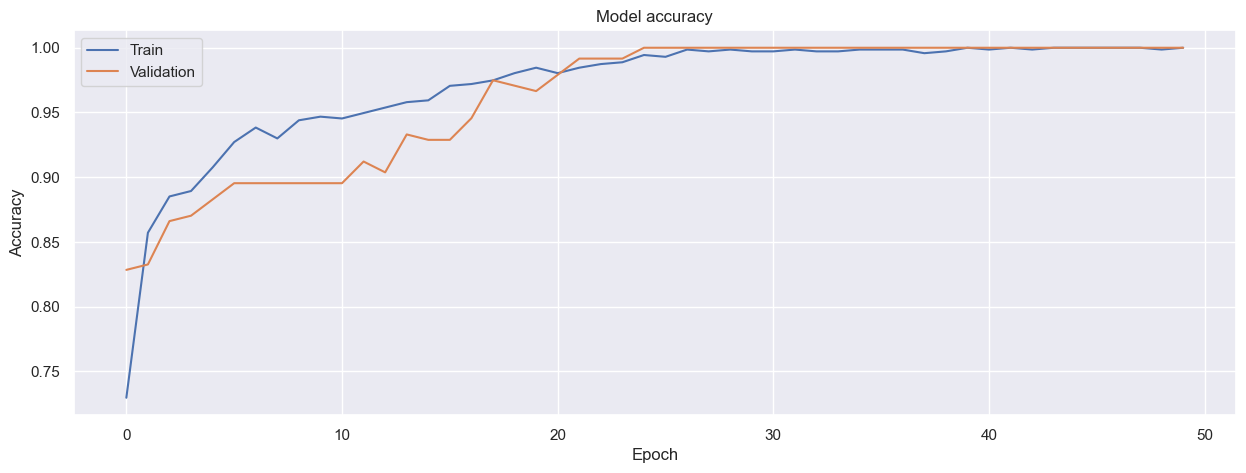

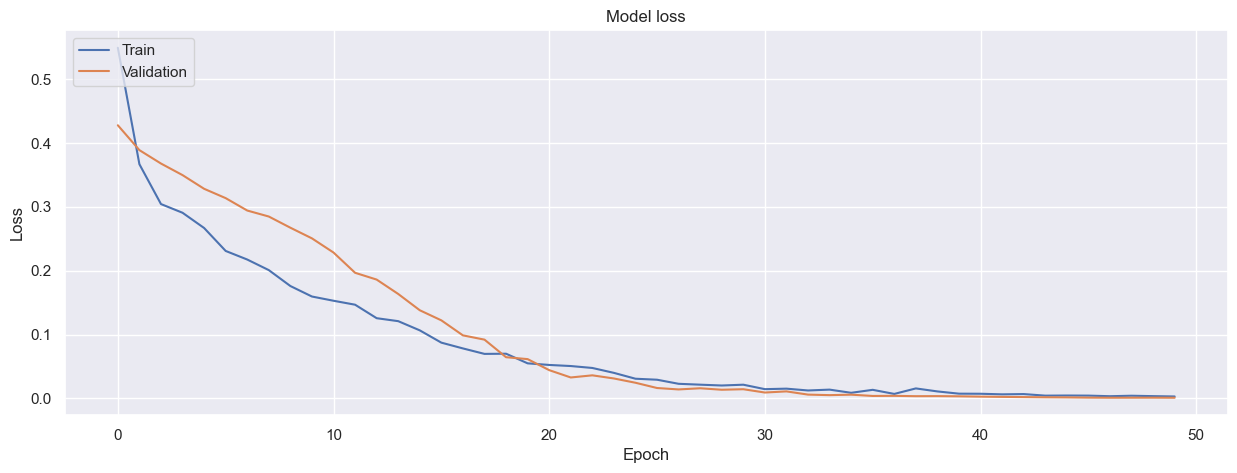

In [12]:
# Plot training & validation loss values
sns.set(rc={'figure.figsize':(15,5)})
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

#### From the graph we can say that our model converges very well on the data.

### Confusion Matrix

8/8 [==============================] - 0s 3ms/step


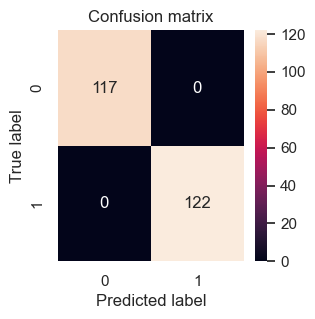

In [13]:
sns.set(rc={'figure.figsize':(3,3)})

# Generate predictions for the test data
y_pred = model.predict(x_val)

# Convert predictions to class labels
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_val, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_test_class, y_pred_class)

# Plot confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## 2) Mobile Dataset

In [14]:
df2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [15]:
df2.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#### Here the target variable 'price_range' is Categorical value instead of Continous value variable 

### Data Visualization

<AxesSubplot:>

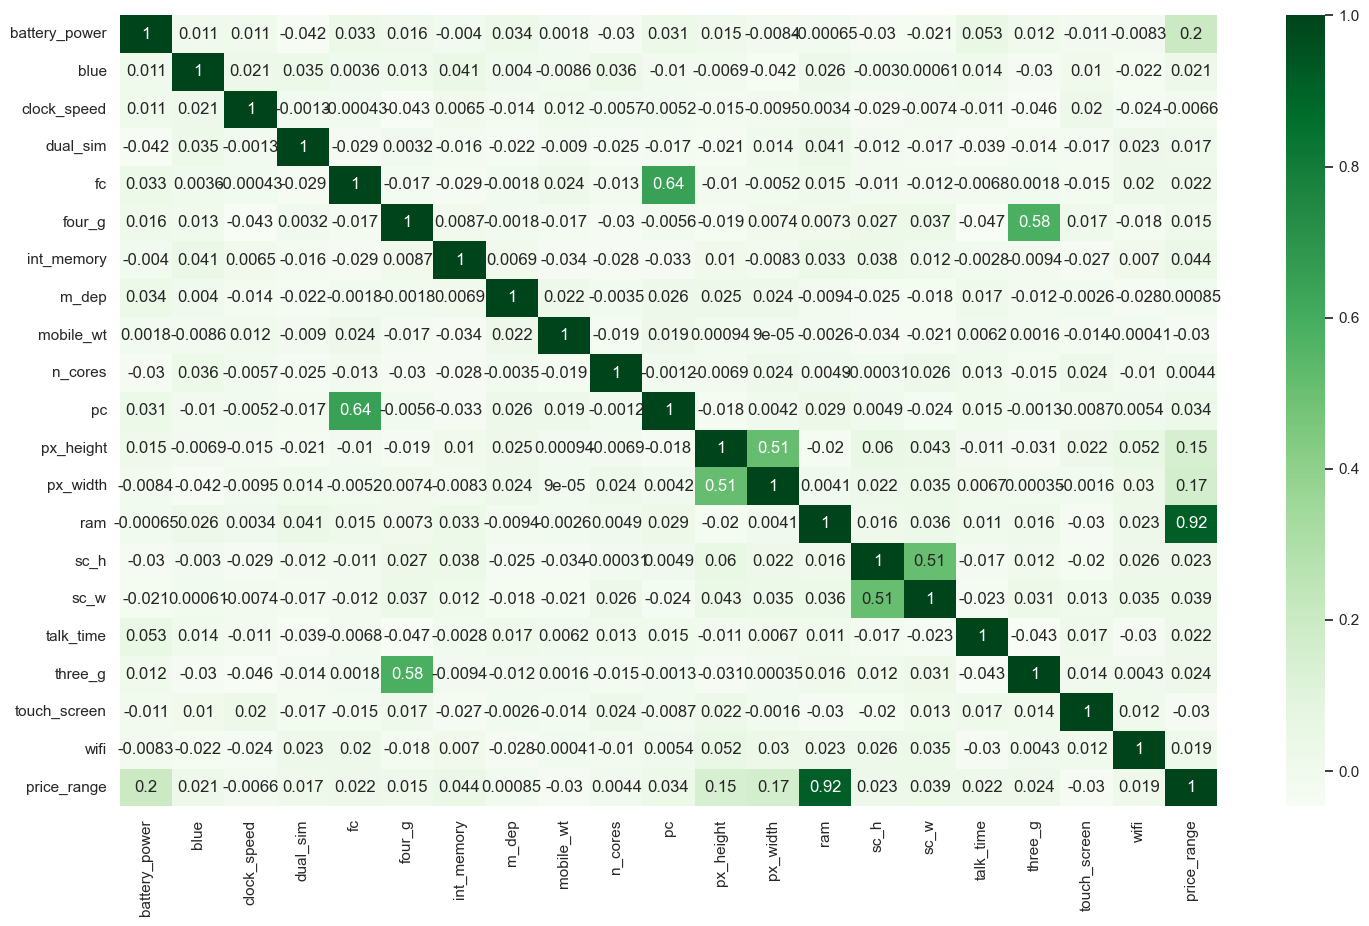

In [16]:
sns.set(rc={'figure.figsize':(17.7,10.27)})
sns.heatmap(df2.corr(), cmap="Greens",annot =True)

Meaningful correlation with price_range:  
* ram = 0.92  
* battery_power = 0.2
* px_width = 0.17
* px_height = 0.15

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

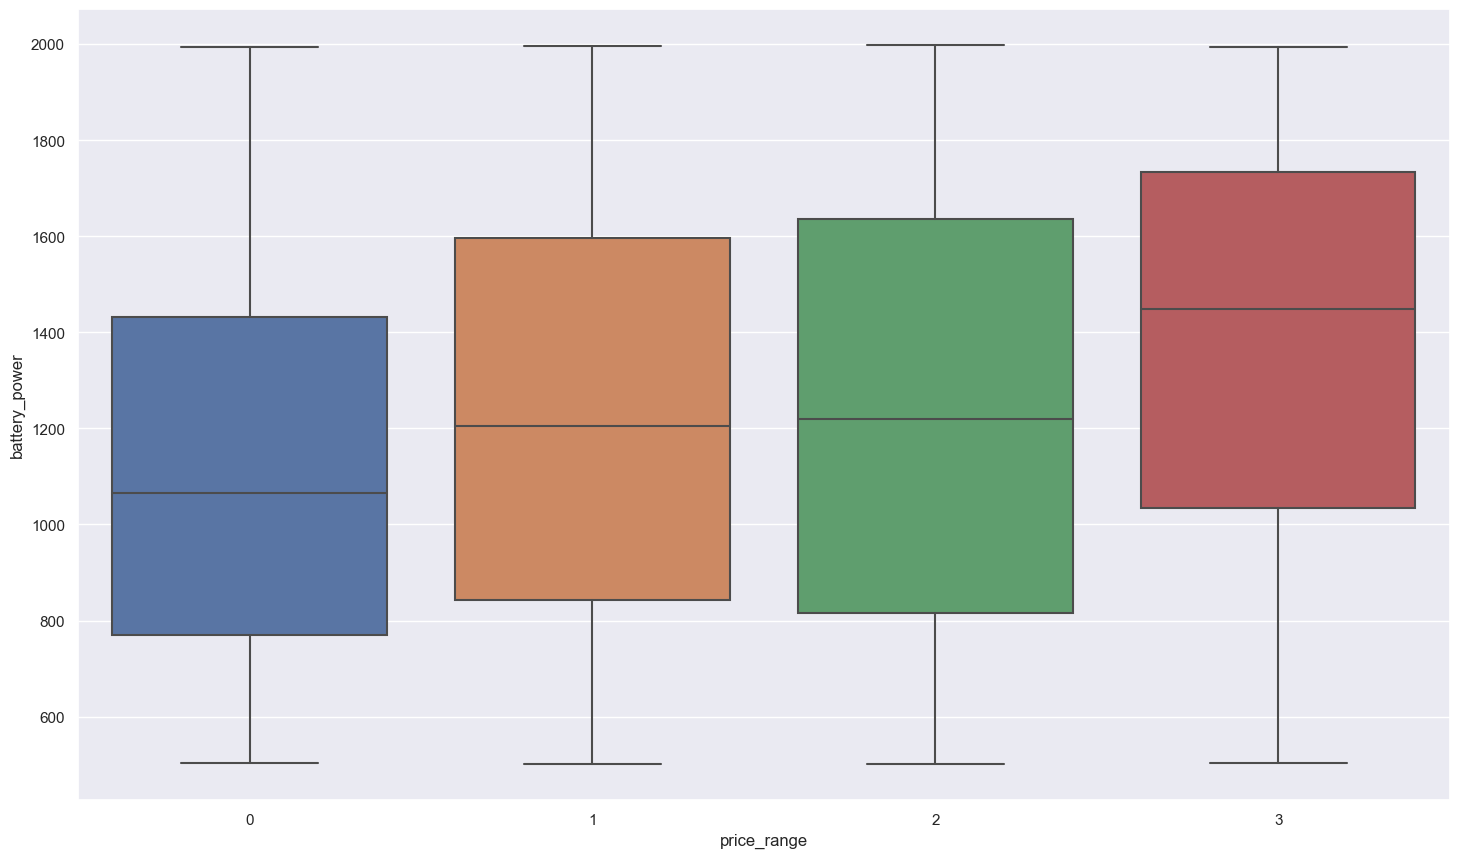

In [17]:
sns.boxplot(x="price_range", y="battery_power", data=df2)

* Price_range class 1 and 2 don't have major significance on battery_power.  
* However, there is a noticiable change in battery_power when class 0 and 3 are compared

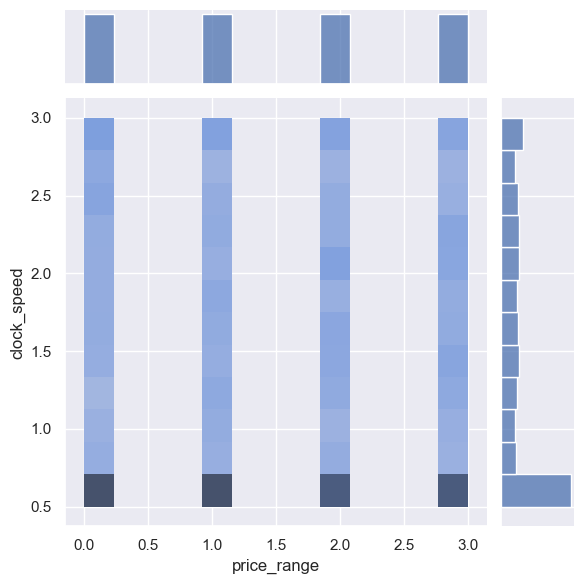

In [50]:
sns.jointplot(x='price_range',y='clock_speed',data=df2,kind="hist");

* Majority of phones irrespective of their price range provides clock_speed of 0.5 

### Train-Test splitting

In [20]:
x = df2.iloc[:,0:20]
y = df2.iloc[:,20:21]
x_train,x_val,y_train,y_val = train_test_split(x,y,shuffle = True,test_size=0.25)

# One Hot Encoding
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)

### Data Normalization

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### Artificial Neural Network Classifier 2

### Initial Modelling (2-3 layered) 

#### Neural Network Model :  64 --> 32-->4

In [22]:
model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(x_train, y_train, epochs=50, validation_data = (x_val,y_val), batch_size=32)

Epoch 1/50
47/47 [==============================] - 1s 8ms/step - loss: 1.3707 - accuracy: 0.3247 - val_loss: 1.2855 - val_accuracy: 0.3920
Epoch 2/50
47/47 [==============================] - 0s 7ms/step - loss: 1.1568 - accuracy: 0.5380 - val_loss: 1.0563 - val_accuracy: 0.5600
Epoch 3/50
47/47 [==============================] - 0s 6ms/step - loss: 0.9022 - accuracy: 0.6733 - val_loss: 0.8087 - val_accuracy: 0.6560
Epoch 4/50
47/47 [==============================] - 0s 6ms/step - loss: 0.6807 - accuracy: 0.7847 - val_loss: 0.6313 - val_accuracy: 0.7700
Epoch 5/50
47/47 [==============================] - 0s 7ms/step - loss: 0.5274 - accuracy: 0.8507 - val_loss: 0.5075 - val_accuracy: 0.8240
Epoch 6/50
47/47 [==============================] - 0s 6ms/step - loss: 0.4223 - accuracy: 0.8900 - val_loss: 0.4328 - val_accuracy: 0.8360
Epoch 7/50
47/47 [==============================] - 0s 6ms/step - loss: 0.3467 - accuracy: 0.9167 - val_loss: 0.3716 - val_accuracy: 0.8700
Epoch 8/50
47/47 [==

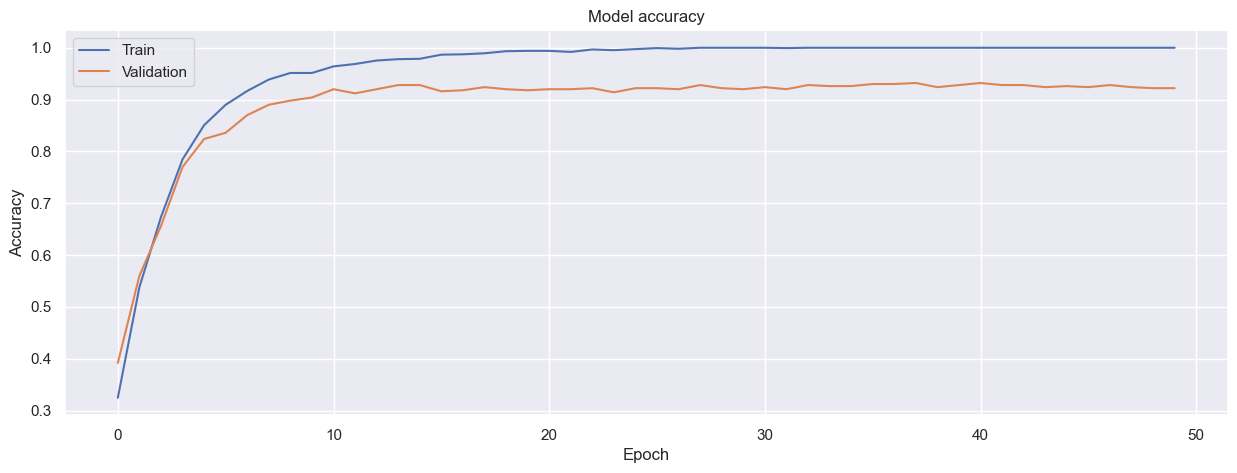

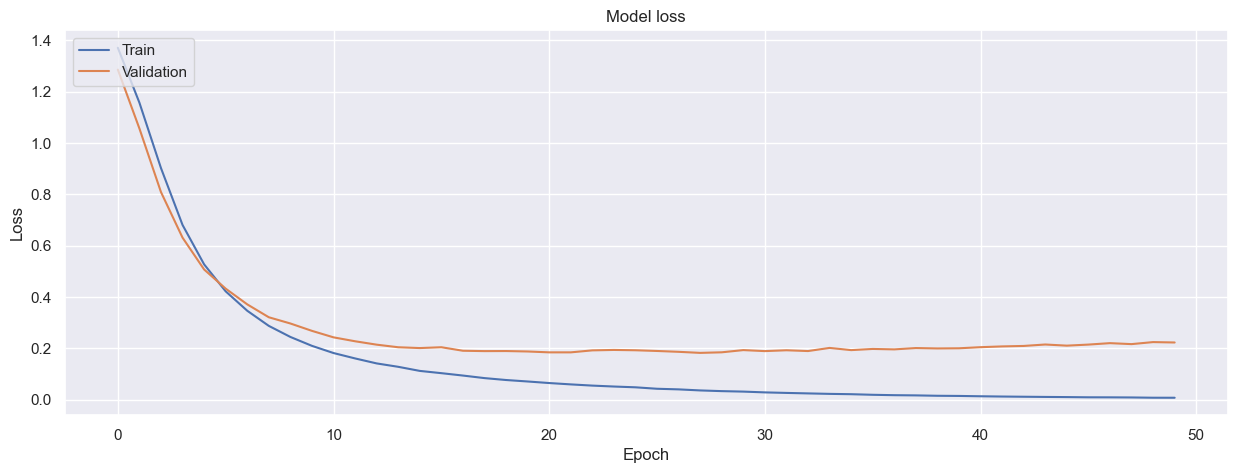

In [23]:
# Plot training & validation loss values
sns.set(rc={'figure.figsize':(15,5)})
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Multi-class Confusion Matrix

16/16 [==============================] - 0s 2ms/step


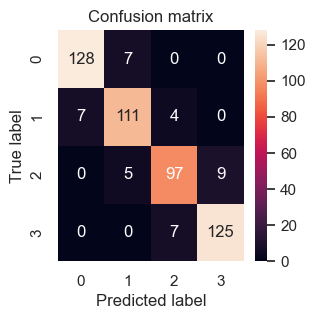

In [24]:
sns.set(rc={'figure.figsize':(3,3)})

# Generate predictions for the test data
y_pred = model.predict(x_val)

# Convert predictions to class labels
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_val, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_test_class, y_pred_class)

# Plot confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### Now same dataset will be used for regression to predict battery power

### Train-Test Splitting

In [25]:
x = df2.iloc[:,1:]
y=  df2.iloc[:,0:1]

x_train,x_val,y_train,y_val = train_test_split(x,y,shuffle = True,test_size=0.25)


### Data Normalization and Preprocessing

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalery = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

# Converting to NumPy Arrays and Reshaping 
y_train = np.array(y_train)
y_val = np.array(y_val)

y_train = y_train.reshape(1500,1)
y_val = y_val.reshape(500,1)

# Normalizing Data
y_train = scalery.fit_transform(y_train)
y_val = scalery.transform(y_val)

### Artificial Neural Network Regressor

In [27]:
# Define the model
model = Sequential()
model.add(Dense(128, input_dim=20, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='rmsprop')

# Callback and fitting 
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)
history=model.fit(x_train, y_train, epochs=30, validation_data = (x_val,y_val), batch_size=32, callbacks= [callback])

Epoch 1/30
47/47 [==============================] - 1s 13ms/step - loss: 1.0201 - val_loss: 1.0175
Epoch 2/30
47/47 [==============================] - 1s 11ms/step - loss: 0.9965 - val_loss: 1.0211
Epoch 3/30
47/47 [==============================] - 1s 11ms/step - loss: 0.9832 - val_loss: 1.0058
Epoch 4/30
47/47 [==============================] - 1s 11ms/step - loss: 0.9602 - val_loss: 0.9949
Epoch 5/30
47/47 [==============================] - 1s 11ms/step - loss: 0.9372 - val_loss: 0.9681
Epoch 6/30
47/47 [==============================] - 1s 11ms/step - loss: 0.8883 - val_loss: 0.9521
Epoch 7/30
47/47 [==============================] - 1s 11ms/step - loss: 0.8310 - val_loss: 0.8902
Epoch 8/30
47/47 [==============================] - 1s 11ms/step - loss: 0.7821 - val_loss: 0.8575
Epoch 9/30
47/47 [==============================] - 1s 11ms/step - loss: 0.7368 - val_loss: 0.8421
Epoch 10/30
47/47 [==============================] - 1s 11ms/step - loss: 0.7023 - val_loss: 0.8341
Epoch 11/

In [28]:
y_pred = model.predict(x_val)
y_pred = scalery.inverse_transform(y_pred)
y_val = scalery.inverse_transform(y_val)

16/16 [==============================] - 0s 3ms/step


In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,y_pred,squared =False)

399.89128429499686

## 3) 50_startups Dataset

In [30]:
df3.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Data Visualization

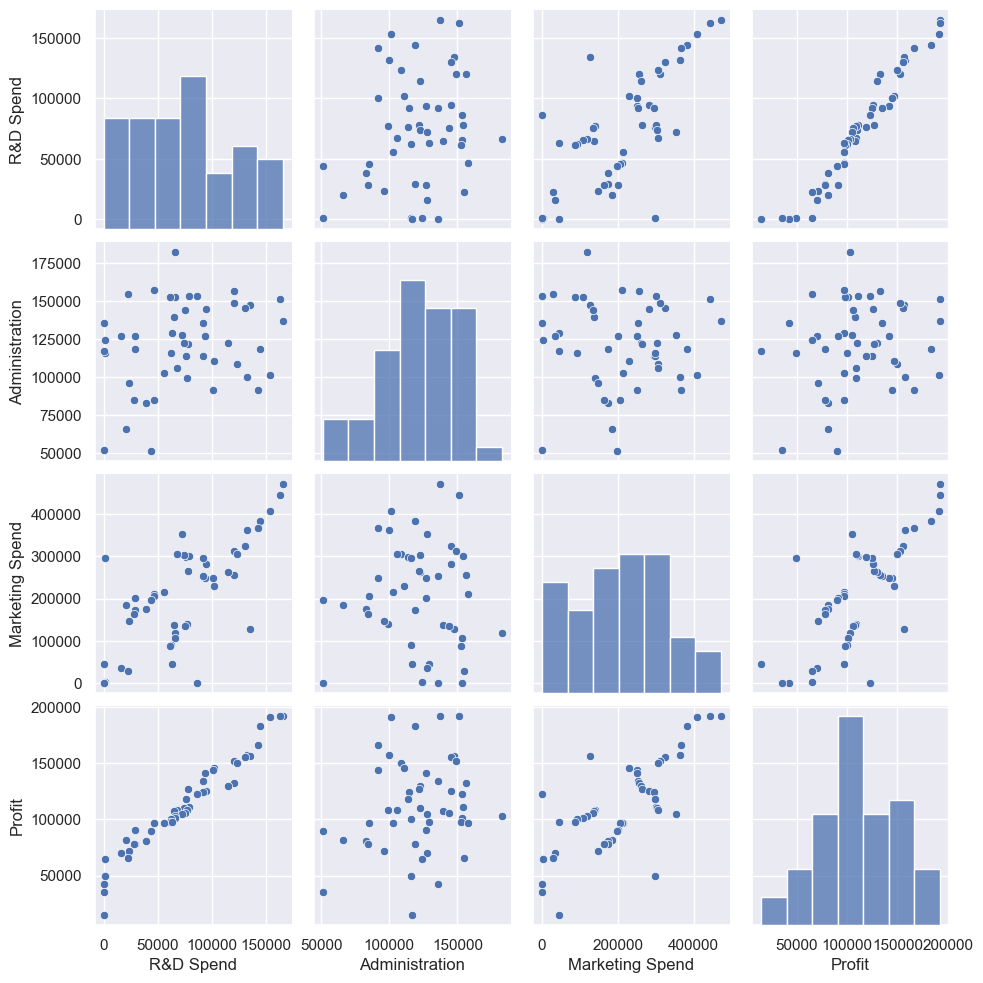

In [31]:
sns.pairplot(df3)
plt.show()

* Marketing Spend and R&D Spend have linear relationship with Profit.  
* Moreover, both the features have linear relationship with each other.  
* Administration doesn't have linear relationship with any feature or target variable

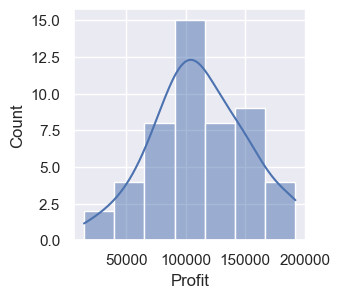

In [32]:
sns.histplot(data = df3["Profit"] , kde=True)
plt.show()

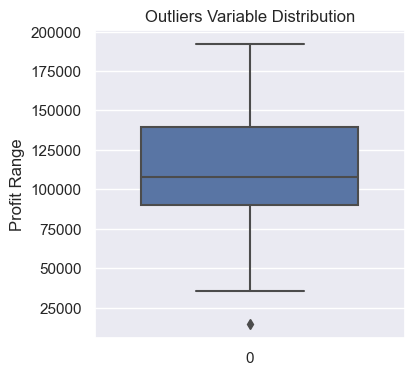

In [33]:
outliers = "Profit"
plt.rcParams['figure.figsize'] = [4,4]
sns.boxplot(data=df3[outliers] , orient='v' , width=0.7)
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.show()

* Most of the companies have proift around 100000.
* There is only one outlier where the profit of the startup is less than 25000

### Data Cleaning and inferencing

In [34]:
df3['State'].unique

<bound method Series.unique of 0       New York
1     California
2        Florida
3       New York
4        Florida
5       New York
6     California
7        Florida
8       New York
9     California
10       Florida
11    California
12       Florida
13    California
14       Florida
15      New York
16    California
17      New York
18       Florida
19      New York
20    California
21      New York
22       Florida
23       Florida
24      New York
25    California
26       Florida
27      New York
28       Florida
29      New York
30       Florida
31      New York
32    California
33       Florida
34    California
35      New York
36       Florida
37    California
38      New York
39    California
40    California
41       Florida
42    California
43      New York
44    California
45      New York
46       Florida
47    California
48      New York
49    California
Name: State, dtype: object>

In [35]:
df3.shape

(50, 5)

In [36]:
df3.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


* Number of unique values of attribute States = Number of entries in the dataset. Therefore, we will drop it
* R&D spend has high correlation with Profit
* R&D spend and Marketing Spend has high inter correlation 

In [37]:
df3.drop(labels='State', axis=1,inplace=True)

In [38]:
x = df3.iloc[:,0:3]
y = df3.iloc[:,3:4]

### Artificial Neural Network Regressor 2

In [39]:
model = Sequential()
model.add(Dense(64, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation = 'relu'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Callback and fitting 
callback = EarlyStopping(monitor='loss', patience=3, restore_best_weights = True)
history=model.fit(x, y, epochs=50, batch_size=5, callbacks= [callback])

Epoch 1/50
10/10 [==============================] - 0s 5ms/step - loss: 11798544384.0000
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 4271789824.0000
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 1196648704.0000
Epoch 4/50
10/10 [==============================] - 0s 4ms/step - loss: 912329088.0000
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 687169088.0000
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 511474304.0000
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 452732352.0000
Epoch 8/50
10/10 [==============================] - 0s 5ms/step - loss: 378866592.0000
Epoch 9/50
10/10 [==============================] - 0s 5ms/step - loss: 341752160.0000
Epoch 10/50
10/10 [==============================] - 0s 5ms/step - loss: 316082144.0000
Epoch 11/50
10/10 [==============================] - 0s 5ms/step - loss: 297335232.0000
Epoch 12/50
10/10 [==================

In [40]:
y_preds = model.predict(x)

2/2 [==============================] - 0s 3ms/step


In [41]:
mean_squared_error(y,y_preds,squared =False)

13195.69262580589

# Summary of Assignment

| Dataset | Model | Test Accuracy/MSE |
|--|--|--|
|Heart Attack Data| ANN Classifier | 100.0% |
| Mobile Dataset| ANN Classifier | 92.2% |
|Mobile Dataset| ANN Regressor|399|
| 50_startups Data| ANN Regressor | 13195 |

#### References

1) Sklearn official documentation.  
2) TensorFlow official documentation.  
